## RFM Analysis

F:- Frequency of transactions/login by a particular customer.

R:- Recency. How recently the customer has visited/transacted on the store.

M:- Monetory. The amount spent by the customer on the store.

## Data Info

CustomerID is customer Identifier

InvoiceNo is transaction identifier (bill).

## Objective

Build an RFM segmentation of these customers. The segmentation should build relevant clusters, show how these segments differ from each other (KPIs) and explain the engagement strategy for each segment, i.e. how should the brand be engaging these customers, what type of campaigns they should run, how will this affect the KPIs. 

In [1]:
import pandas as pd
import numpy as np
import utility_functions as uf
import os
import datetime as dt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Clustering 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("data.csv")


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#Create an object for the entire data
data_obj = uf.GetStats(data)

#Distribution of All Countries
data_obj.categorical_distribution('Country').head()

,Category,Counts,Percentage
34,United Kingdom,495478,91.43
11,Germany,9495,1.75
30,France,8557,1.58
22,EIRE,8196,1.51
37,Spain,2533,0.47


## UK Data

91.43 % of the data belongs to UK

In [5]:
uk_data = data.loc[data['Country']=='United Kingdom', :]
print("Record size:-\nOverall:- {}\t UK Specific:- {}" .format(data.shape, uk_data.shape))

Record size:-
Overall:- (541909, 8)	 UK Specific:- (495478, 8)


In [6]:
uk_data_obj = uf.GetStats(uk_data)


In [7]:
#Get the statistics
uk_data_stats = uk_data_obj.driver()
uk_data_stats
#Write the stats to a file

#uk_data_stats.to_csv(os.getcwd() + "/Statistics/Descriptive Statistics.csv")

,Features,Missing Value Count,Missing Value Percentage,Data Types,count,mean,std,min,25%,50%,75%,max,# Categories
0,CustomerID,133600,0.269639,float64,361878.0,15547.871368,1594.402590,12346.00,14194.00,15514.0,16931.00,18287.0,NaN
1,Description,1454,0.002935,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4203.0
2,InvoiceNo,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23494.0
3,StockCode,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4065.0
4,Quantity,0,0.000000,int64,495478.0,8.605486,227.588756,-80995.00,1.00,3.0,10.00,80995.0,NaN
5,InvoiceDate,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21220.0
6,UnitPrice,0,0.000000,float64,495478.0,4.532422,99.315438,-11062.06,1.25,2.1,4.13,38970.0,NaN
7,Country,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Dealing with Missing CustomerID

1. Drop the records with missing values. ~27% data loss.
2. Drop the column. Not feasible. CustomerID is the identifier.
3. Imputation. Customer Count = 3,61,878


#Chosing option 1 in the interest of time


In [8]:
#26.96 % of rows for CustomerIDs is missing 
print("Missing Customer Records:- %d\nNA Free Customer Records:- %d\nTotal:- %d" \
      %(133600, 495478-133600, 495478))
print("Missing Customer Records Percentage:- %.2f" %((133600*100)/495478))

Missing Customer Records:- 133600
NA Free Customer Records:- 361878
Total:- 495478
Missing Customer Records Percentage:- 26.96


In [9]:
#Check a few observations belonging to Missing CustomerID
uk_data_NA_cust = uk_data.loc[uk_data['CustomerID'].isnull(), :]
uk_data_NA_free_cust = uk_data.loc[~uk_data['CustomerID'].isnull(), :]

#Check the stats for uk_data_NA_free_cust 
uk_data_NA_free_obj = uf.GetStats(uk_data_NA_free_cust)
uk_data_NA_free_obj.driver()

,Features,Missing Value Count,Missing Value Percentage,Data Types,count,mean,std,min,25%,50%,75%,max,# Categories
0,InvoiceNo,0,0.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19857.0
1,StockCode,0,0.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3661.0
2,Description,0,0.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3860.0
3,Quantity,0,0.0,int64,361878.0,11.077029,263.129266,-80995.0,2.00,4.00,12.00,80995.0,NaN
4,InvoiceDate,0,0.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18441.0
5,UnitPrice,0,0.0,float64,361878.0,3.256007,70.654731,0.0,1.25,1.95,3.75,38970.0,NaN
6,CustomerID,0,0.0,float64,361878.0,15547.871368,1594.402590,12346.0,14194.00,15514.00,16931.00,18287.0,NaN
7,Country,0,0.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
# uk_data
# uk_data_NA_cust
# uk_data_NA_free_cust
def data_manipulation(data):
    '''
    Creating derived variables related to Invoice Date and Amount.
    
    '''
    data['InvoiceNo_Date'] = data['InvoiceNo'] + '_' + data['InvoiceDate']
    data['InvoiceDateExclusive'] = list(map(lambda date_time: date_time.split()[0], \
                                        data['InvoiceDate'].tolist()))
    data['InvoiceTimeExclusive'] = list(map(lambda date_time: date_time.split()[1], \
                                        data['InvoiceDate'].tolist()))
    
    #Convert to date
    data['InvoiceDate_new'] = pd.to_datetime(data['InvoiceDate'])
    data['InvoiceDateExclusive'] = pd.to_datetime(data['InvoiceDateExclusive'])
    
    #Get the total amount
    data['Total Amount'] = data['Quantity'] * data['UnitPrice']
    
    return data

In [11]:
#Check count of unique InvoiceNo for Null Customers
#InvoiceNo does not contain Missing Values
len(set(uk_data_NA_free_cust['InvoiceNo'])) #19,857


19857

In [66]:
#Check the unique combination of InvoiceNo and InvoiceDate
#Check both NA Customers(uk_data_NA_cust_data) and Filled Customers
uk_data_NA_free_cust = data_manipulation(uk_data_NA_free_cust)

#Write the data free from missing values to a file
uk_data_NA_free_cust.to_csv(os.getcwd() + '/Statistics/UK_data_NA_free.csv')

In [13]:
uk_data_NA_free_cust[['InvoiceNo', 'InvoiceDate_new', 'InvoiceTimeExclusive', \
         'InvoiceDateExclusive', 'InvoiceNo_Date', 'Quantity', \
         'UnitPrice', 'Total Amount']].head()

,InvoiceNo,InvoiceDate_new,InvoiceTimeExclusive,InvoiceDateExclusive,InvoiceNo_Date,Quantity,UnitPrice,Total Amount
0,536365,2010-12-01 08:26:00,8:26,2010-12-01,536365_12/1/2010 8:26,6,2.55,15.30
1,536365,2010-12-01 08:26:00,8:26,2010-12-01,536365_12/1/2010 8:26,6,3.39,20.34
2,536365,2010-12-01 08:26:00,8:26,2010-12-01,536365_12/1/2010 8:26,8,2.75,22.00
3,536365,2010-12-01 08:26:00,8:26,2010-12-01,536365_12/1/2010 8:26,6,3.39,20.34
4,536365,2010-12-01 08:26:00,8:26,2010-12-01,536365_12/1/2010 8:26,6,3.39,20.34


## Analyze Customer Behaviour

In [14]:
#Check unique customer counts
#Distinct Customers:-    3,950
#Total transactions:- 4,95,478
customer_grp = uk_data_NA_free_cust.groupby('CustomerID')


## R
Recency:- The amount of time since the last transaction of a customer 


In [15]:
def get_recency():
    #Select the recent date of transaction for each and every customer
    #1-Date  per Customer. Time in  days
    recency = customer_grp.apply(lambda df: \
                             df.sort_values(by='InvoiceDate_new', ascending=False)\
                             .iloc[0, :])
    
    recency = pd.DataFrame(recency)
    if('CustomerID' in recency.columns):
        recency = recency.drop('CustomerID', axis=1)
        
    #Sort in descending order of InvoiceDate_new
    recency = recency.sort_values(by='InvoiceDate_new', ascending=False)
    
    #Time since the last transaction = Current Date - Maximum Invoice Date
    recency['TimeSinceLastTxn'] = pd.Timestamp(dt.datetime.now()) - recency['InvoiceDate_new']
    
    #Extract days from the above
    recency['Days_SinceLastTxn'] = recency['TimeSinceLastTxn'].apply(lambda diff:diff.days)
    recency['Years_SinceLastTxn'] = recency['Days_SinceLastTxn']/365
    recency['Months_SinceLastTxn'] = recency['Years_SinceLastTxn']*12
    #Recent will be at the top
    
    #Most recent transactions(InvoiceDate_new) will be at the top
    recency = recency[['Days_SinceLastTxn', 'Years_SinceLastTxn',\
                      'Months_SinceLastTxn']].reset_index() #CustomerID will become a column
    recency.to_csv(os.getcwd() + "/Statistics/Recency_Customers.csv")
    
    return recency

recency = get_recency()
recency.head()
#(3950, 12)

,CustomerID,Days_SinceLastTxn,Years_SinceLastTxn,Months_SinceLastTxn
0,13113.0,3794,10.394521,124.734247
1,15804.0,3794,10.394521,124.734247
2,13777.0,3794,10.394521,124.734247
3,17581.0,3794,10.394521,124.734247
4,12748.0,3794,10.394521,124.734247


In [16]:
#Plot Recency
def plotting_dist(cust_data, var, plot_name):
    sns_plt = sns.distplot(cust_data[var],bins=8,kde=False,rug=True)
    fig = sns_plt.get_figure()
    fig.savefig(os.getcwd() + '/Plots/' + plot_name + '.png')

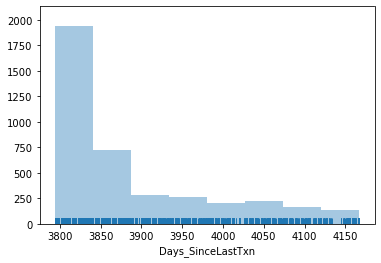

In [17]:
#Distribution of Days Since Last Transaction
plotting_dist(recency, 'Days_SinceLastTxn', 'Recency_Plot_Days')

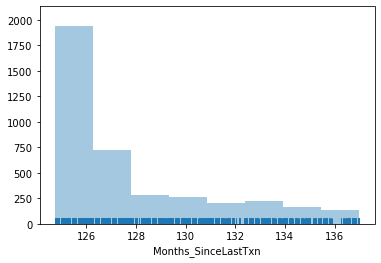

In [18]:
#Distribution of Months Since Last Transaction
plotting_dist(recency, 'Months_SinceLastTxn', 'Recency_Plot_Months')

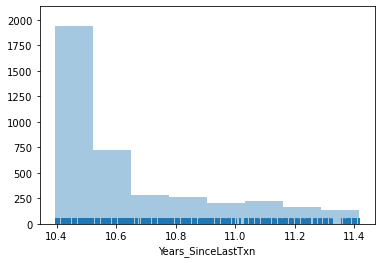

In [19]:
#Distribution of Years Since Last Transaction
plotting_dist(recency, 'Years_SinceLastTxn', 'Recency_Plot_Years')

## F

Frequency:- The total number of transactions carried out by a customer

### Customer wise InvoiceDate and InvoiceNo

Check for same customers, same InvoiceNo and different InvoiceDate. --> Suspecious.

Check for same customers, same InvoiceDate and different InvoiceNo. --> Multiple Transaction on the day

In [20]:
def get_frequency():
    #A particular customer can have multiple invoices on the same day.
    #Count Unique Invoices for each customer

    unique_invoices_count = pd.DataFrame(customer_grp.apply(lambda df: len(np.unique(df['InvoiceNo']))))
    unique_invoices_count = unique_invoices_count.rename(columns={0:'InvoiceNo Counts'})
    unique_invoices_count = unique_invoices_count.sort_values(by='InvoiceNo Counts', ascending=False)
    
    #Count Unique InvoiceNo_Date combination for each customer
    unique_invoice_date_count = pd.DataFrame(customer_grp.apply(lambda df: len(np.unique(df['InvoiceNo_Date']))))
    unique_invoice_date_count = unique_invoice_date_count.rename(columns={0:'InvoiceNo_Date Counts'})
    unique_invoice_date_count = unique_invoice_date_count.sort_values(by='InvoiceNo_Date Counts', ascending=False)
    
    #Join the 2 data frames
    unique_invoices_count = unique_invoices_count.reset_index()
    unique_invoice_date_count = unique_invoice_date_count.reset_index()

    frequency = pd.merge(unique_invoices_count, unique_invoice_date_count, on='CustomerID', how='left')

    #Difference in Counts
    frequency["Difference"] = frequency['InvoiceNo_Date Counts'] - frequency['InvoiceNo Counts']
    frequency.to_csv(os.getcwd() + "/Statistics/Frequency_Customers.csv")

    return frequency

frequency = get_frequency()
frequency.head()

,CustomerID,InvoiceNo Counts,InvoiceNo_Date Counts,Difference
0,12748.0,224,225,1
1,17841.0,169,169,0
2,14606.0,128,130,2
3,13089.0,118,118,0
4,15311.0,118,118,0


In [21]:
#Count of Difference
#Counter({1: 24, 0: 3924, 2: 2}):- 26(24+2) Customers
Counter(frequency['Difference'])

Counter({1: 24, 0: 3924, 2: 2})

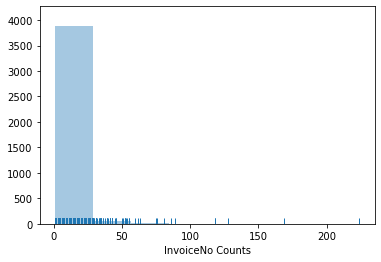

In [22]:
plotting_dist(frequency, 'InvoiceNo Counts', 'Frequency_Plot')

In [23]:
#Group By ['CustomerID', 'InvoiceNo']
#Obtain the counts, InvoiceNo_Date Counts and the values
# cust_invoice_grp = pd.DataFrame(uk_data.groupby('CustomerID', 'InvoiceNo'))
# cust_invoice_grp


## M

Monetory:- The total value of the transactions carried out by a customer across all it's transactions

### Negative Amount

Negative Total Amount is corresponding to Cancelled item indicated by InvoiceNo begining with C

In [24]:
#ATS of each customer
#'Total Amount'

'''
def get_monetary():
    #Monetary
    monetary = customer_grp.apply(lambda df: max(df['Total Amount']))
    
def compute_ATS(df):
    
#     ATS is the Average Transaction Size for each customer
#     ATS = (Total Transaction Amount)/(Number of Transactions)
    
    sum(df[])/df.shape[0]

'''
def get_monetary():
    monetary = pd.DataFrame(customer_grp.apply(lambda df: sum(df['Total Amount'])))#, max(df['Total Amount'])]))
    monetary = monetary.rename(columns={0:'Total Amount'})
    
    monetary = monetary.reset_index()
    return monetary

monetary = get_monetary()
monetary.head()


,CustomerID,Total Amount
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


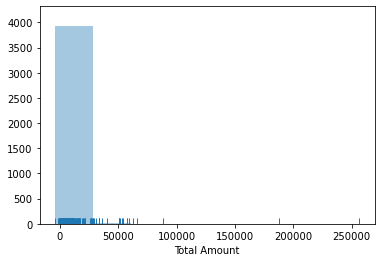

In [25]:
plotting_dist(monetary, 'Total Amount', 'Monetary_Plot')

(array([3.876e+03, 1.800e+01, 8.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.24344979e-14, 2.56438490e+04, 5.12876980e+04, 7.69315470e+04,
        1.02575396e+05, 1.28219245e+05, 1.53863094e+05, 1.79506943e+05,
        2.05150792e+05, 2.30794641e+05, 2.56438490e+05]),
 <BarContainer object of 10 artists>)

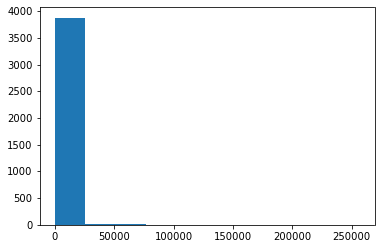

In [26]:
#>0 Total Amount
monetary_non_zero = monetary.loc[monetary['Total Amount']>0, :]
plt.hist(monetary_non_zero['Total Amount'])

In [27]:
monetary_non_zero.shape, monetary.shape

((3905, 2), (3950, 2))

## Total Amount = 0

Aggregated:- The sum of total amount for a customer can be 0 because of cancellation of purchased items.

Total Amount can also be 0 due to UnitPrice = 0

In [28]:
#Check for customers with Total Amount = 0
#[12346.0, 13256.0, 14557.0, 14792.0, 16742.0, 16878.0, 18268.0]
customers_zero_M = monetary.loc[monetary['Total Amount']==0, 'CustomerID'].tolist()
customers_zero_M

[12346.0, 13256.0, 14557.0, 14792.0, 16742.0, 16878.0, 18268.0]

In [29]:
#12346.0, 13256.0, 14557.0, 14792.0, 16742.0, 16878.0, 18268.0]]

uk_data_NA_free_cust_index = uk_data_NA_free_cust.set_index('CustomerID')
uk_data_NA_free_cust_index.loc[customers_zero_M, :].sort_values(by='CustomerID', axis=0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceNo_Date,InvoiceDateExclusive,InvoiceTimeExclusive,InvoiceDate_new,Total Amount
CustomerID,,,,,,,,,,,,
12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,541431_1/18/2011 10:01,2011-01-18,10:01,2011-01-18 10:01:00,77183.60
12346.0,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,United Kingdom,C541433_1/18/2011 10:17,2011-01-18,10:17,2011-01-18 10:17:00,-77183.60
13256.0,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,United Kingdom,578841_11/25/2011 15:57,2011-11-25,15:57,2011-11-25 15:57:00,0.00
14557.0,C569995,23301,GARDENERS KNEELING PAD KEEP CALM,-48,10/6/2011 20:36,1.45,United Kingdom,C569995_10/6/2011 20:36,2011-10-06,20:36,2011-10-06 20:36:00,-69.60
14557.0,C569995,23267,SET OF 4 SANTA PLACE SETTINGS,-48,10/6/2011 20:36,1.25,United Kingdom,C569995_10/6/2011 20:36,2011-10-06,20:36,2011-10-06 20:36:00,-60.00
14557.0,C569995,23154,SET OF 4 JAM JAR MAGNETS,-48,10/6/2011 20:36,2.08,United Kingdom,C569995_10/6/2011 20:36,2011-10-06,20:36,2011-10-06 20:36:00,-99.84
14557.0,C569995,23120,PACK OF 6 SMALL FRUIT STRAWS,-48,10/6/2011 20:36,0.42,United Kingdom,C569995_10/6/2011 20:36,2011-10-06,20:36,2011-10-06 20:36:00,-20.16
14557.0,C569995,22960,JAM MAKING SET WITH JARS,-12,10/6/2011 20:36,3.75,United Kingdom,C569995_10/6/2011 20:36,2011-10-06,20:36,2011-10-06 20:36:00,-45.00
14557.0,C569995,22952,60 CAKE CASES VINTAGE CHRISTMAS,-24,10/6/2011 20:36,0.55,United Kingdom,C569995_10/6/2011 20:36,2011-10-06,20:36,2011-10-06 20:36:00,-13.20


In [30]:
#(51, 12). 51 records belong to customers having No net purchase.(Includes cancellation)
#Records with customers having 0 Aggregated Total Amount = 51
uk_data_NA_free_cust_index.loc[customers_zero_M, :].shape

(51, 12)

In [31]:
#(24, 12). 24 Records have 0 Unit Price and hence 0 Total Amount
uk_data_NA_free_cust_index.loc[(uk_data_NA_free_cust_index['UnitPrice']==0), :].shape# &\
                  #(set(uk_data_NA_free_cust_index.index).intersection(set(customers_zero_M))!=set()), :]

(24, 12)


## Assigning Order to R, F and M

Creating groups of customers for Recency, Frequency and Monetory.

It’s recommended to divide the customers into four tiers for each dimension, such that each customer will be assigned to one tier in each dimension


Recency	                Frequency	                    Monetary

R-Tier-1 (most recent)  F-Tier-1 (most frequent)	    M-Tier-1 (highest spend)

R-Tier-2	            F-Tier-2	                    M-Tier-2

R-Tier-3	            F-Tier-3	                    M-Tier-3

R-Tier-4 (least recent)F-Tier-4 (only one transaction)M-Tier-4 (lowest spend)

## Understanding the Customer Segments

1. Most Recent Very Active High Spending Customers(Present in (R-Tier-1) AND (F-Tier-1) AND (M-Tier-1))

2. Most Recent Very Active Medium Spending Customers(Present in (R-Tier-1) AND (F-Tier-1) AND (M-Tier-2))

3. Churned:- (R-4, F-4, M-1) (R-4, F-4, M-2) 

In [32]:
#Merge the 3 values into a Single Data Frame
#['Days_SinceLastTxn', 'Years_SinceLastTxn', 'Months_SinceLastTxn', 'InvoiceNo Counts', 'Total Amount']
#print(list(map(lambda df:df.shape, [recency, frequency, monetary])))
#[(3950, 4), (3950, 4), (3950, 2)]

def normalize_min_max(data, variable):
    minimum, maximum = min(data[variable]), max(data[variable])
    normalized_variable = list(map(lambda value:(value-minimum)/(maximum-minimum), \
                                  data[variable].tolist()))
    
    return normalized_variable

def get_combined_RFM():
    '''
    Combine the 3 fields R, F and M respectively for the customers.
    Normalize the values of R, F and M in ordr to produce a combined RFM score.
    '''    
    #Join the 3 data frames [recency, frequency, monetary]
    RFM = recency[['CustomerID', 'Days_SinceLastTxn']]
    
    RFM = pd.merge(RFM, frequency[['CustomerID', 'InvoiceNo Counts']], \
                   how='left', on='CustomerID')
    
    RFM = pd.merge(RFM, monetary, how='left', on='CustomerID')
    
    #Obtain the Ranks
    RFM['R_Rank'] = RFM['Days_SinceLastTxn'].rank(ascending=True) #Lesser = Most Recent
    RFM['F_Rank'] = RFM['InvoiceNo Counts'].rank(ascending=False) #Higher = Most Frequent
    RFM['M_Rank'] = RFM['Total Amount'].rank(ascending=False) #Higher = Most Valued Purchase

    #Ranks to be Normalized. Since we want to cluster the customers on the basis of Ranks
    for col in ['R_Rank', 'F_Rank', 'M_Rank']:
        RFM[col + '_nrm'] = normalize_min_max(RFM, col)
        #Bringing the numbers in the range [1, 5]
        RFM[col + '_score'] = list(map(lambda val: (int(val)+5)%5,RFM[col + '_nrm'].tolist()))
        
    RFM['RFM_score'] = RFM['R_Rank_score'] + RFM['F_Rank_score'] + RFM['M_Rank_score']
    
    return RFM
    '''
    [['CustomerID', 'R_Rank', 'F_Rank', 'M_Rank', 'R_Rank_nrm',\
      'F_Rank_nrm', 'M_Rank_nrm', 'R_Rank_score', 'F_Rank_score', \
      'M_Rank_score', 'RFM_score']]
    '''

In [33]:
RFM = get_combined_RFM()

RFM.tail()

,CustomerID,Days_SinceLastTxn,InvoiceNo Counts,Total Amount,R_Rank,F_Rank,M_Rank,R_Rank_nrm,R_Rank_score,F_Rank_nrm,F_Rank_score,M_Rank_nrm,M_Rank_score,RFM_score
3945,17968.0,4167,1,277.35,3943.5,3356.5,2978.0,1.0,1,1.0,1,0.753862,0,2
3946,16583.0,4167,1,233.45,3943.5,3356.5,3137.0,1.0,1,1.0,1,0.794125,0,2
3947,17908.0,4167,1,243.28,3943.5,3356.5,3107.0,1.0,1,1.0,1,0.786528,0,2
3948,13747.0,4167,1,79.60,3943.5,3356.5,3807.0,1.0,1,1.0,1,0.963788,0,2
3949,18074.0,4167,1,489.60,3943.5,3356.5,2269.0,1.0,1,1.0,1,0.574323,0,2


In [34]:
RFM[['R_Rank_score', 'F_Rank_score', 'M_Rank_score','RFM_score']].describe()

,R_Rank_score,F_Rank_score,M_Rank_score,RFM_score
count,3950.000000,3950.000000,3950.000000,3950.000000
mean,0.003544,0.300759,0.000253,0.304557
std,0.059436,0.458646,0.015911,0.468458
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000


In [35]:
RFM[['R_Rank_score', 'F_Rank_score', 'M_Rank_score','RFM_score']].describe()['RFM_score']

count    3950.000000
mean        0.304557
std         0.468458
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: RFM_score, dtype: float64

(array([3.949e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

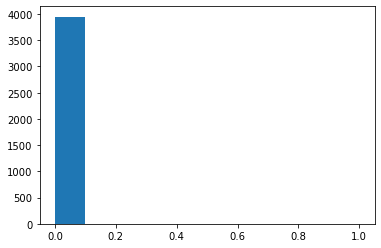

In [36]:
plt.hist(RFM['M_Rank_score'])

(array([3936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

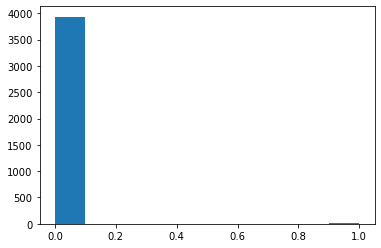

In [37]:
plt.hist(RFM['R_Rank_score'])

(array([2762.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1188.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

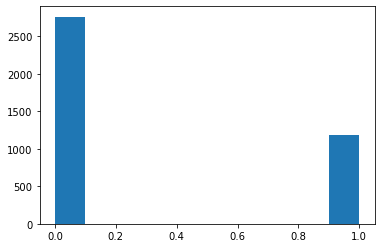

In [38]:
plt.hist(RFM['F_Rank_score'])

(array([2762.,    0.,    0.,    0.,    0., 1173.,    0.,    0.,    0.,
          15.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

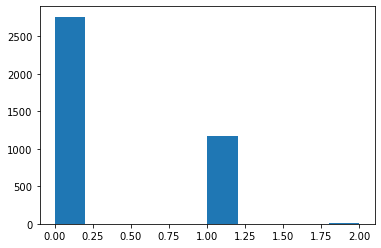

In [39]:
plt.hist(RFM['RFM_score'])

## Optimum Number of Clusters

Find the optimum number of clusters using the Elbow method.
Apply K-Means clustering algorithm. Cluster the RFM normalized variables into clusters.

In [40]:
#Input to KMeans Clustering 
RFM[['R_Rank_nrm', 'F_Rank_nrm', 'M_Rank_nrm']].describe()

,R_Rank_nrm,F_Rank_nrm,M_Rank_nrm
count,3950.000000,3950.000000,3950.000000
mean,0.498918,0.588437,0.500000
std,0.290346,0.333637,0.288785
min,0.000000,0.000000,0.000000
25%,0.241630,0.329906,0.250000
50%,0.502992,0.536582,0.500000
75%,0.750223,1.000000,0.750000
max,1.000000,1.000000,1.000000


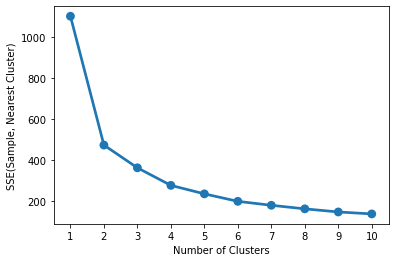

In [41]:
#Inertia: It is the sum of squared distances of samples to their closest cluster center.
SSE = [] 
for k in range(0, 10): #10 possible clusters
    #RFM['R_Rank_nrm']
    RFM_normalized = RFM[['R_Rank_nrm', 'F_Rank_nrm', 'M_Rank_nrm']]
    
    kmeans = KMeans(n_clusters=k+1, random_state=1231).fit(RFM_normalized)
    
    SSE.append(kmeans.inertia_)
    
sns.pointplot(x=list(range(1,11)), y=SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE(Sample, Nearest Cluster)')
plt.savefig(os.getcwd() + '/Plots/Elbow_Method_K_Means.png')
plt.show()

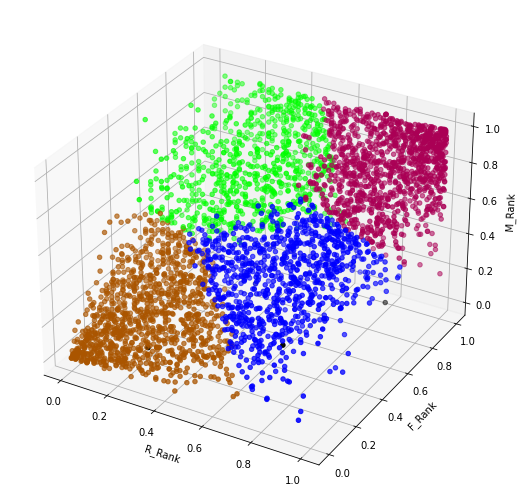

In [61]:
model = KMeans(n_clusters=4, random_state = 1231).fit(RFM_normalized)
centroids = model.cluster_centers_

customer_tags = {0: 'New Customer', 1:'Best Customer', \
                 2:'Churned Customer', 3:'Risk of Leaving'}

predicted_labels = model.predict(RFM_normalized)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RFM_normalized['R_Rank_nrm'], RFM_normalized['F_Rank_nrm'], RFM_normalized['M_Rank_nrm'], \
           cmap='brg', c=predicted_labels)

#print("Unique Predictions Classes:- {}" .format(set(model.predict(RFM_normalized))))

ax.set_xlabel("R_Rank")
ax.set_ylabel("F_Rank")
ax.set_zlabel("M_Rank")

#ax.legend([customer_tags[class_label] for class_label in predicted_labels])
ax.scatter(centroids[:, 0], centroids[:, 1], c='black')
plt.savefig(os.getcwd() + '/Plots/KMeans Clusters.png')


## Obtain Cluster Labels 

In [56]:
RFM['Customer_Segments'] = model.labels_

#Write the final data to a file
RFM.to_csv(os.getcwd() + '/Final_Data.csv')

RFM[['CustomerID', 'Customer_Segments', 'R_Rank_nrm', 'F_Rank_nrm', 'M_Rank_nrm']].head()

,CustomerID,Customer_Segments,R_Rank_nrm,F_Rank_nrm,M_Rank_nrm
0,13113.0,2,0.0,0.010133,0.017726
1,15804.0,2,0.0,0.044107,0.078501
2,13777.0,2,0.0,0.009388,0.007090
3,17581.0,2,0.0,0.016093,0.016713
4,12748.0,2,0.0,0.000000,0.005318


In [57]:
#Statistics of R_Rank, F_Rank, M_Rank
RFM_Stats = RFM.groupby('Customer_Segments').agg({
    'R_Rank':['min', 'mean', 'max', 'count'],
    'F_Rank':['min', 'mean', 'max', 'count'],
    'M_Rank':['min', 'mean', 'max', 'count']
})

RFM_Stats

R_Rank                            F_Rank               \
                      min         mean     max count    min         mean   
Customer_Segments                                                          
0                   965.0  2465.480937  3865.5   918   43.5  1566.259259   
1                  1945.0  3195.162186  3943.5  1153  892.0  3096.190373   
2                    16.0   811.124666  2631.0  1123    1.0   684.082369   
3                    16.0  1249.998016  2430.0   756  609.0  2681.570106   

                                M_Rank                             
                      max count    min         mean     max count  
Customer_Segments                                                  
0                  3356.5   918   30.0  1516.827342  3836.0   918  
1                  3356.5  1153  728.0  3057.633131  3950.0  1153  
2                  2392.0  1123    1.0   745.539626  2860.0  1123  
3                  3356.5   756  310.0  2709.107804  3947.0   756

## Observations from Clusters

Mean Comparison

1. Segment 0:- New Customers. Send mail, push notifications saying:- 'You viewd these items, you might be interested in one of these similar items[Item 1, Item 2, ...]'. Make these customes frequent visitors. Count(918)


2. Segment 3:- Second Most Valuable set(Risk of Leaving). Frequently visiting customers, spending significant amount. But have not recently visited. The marketing team can send reminders about various items present in the stores. Provide coupons and Promo Codes to these Customers. Count(756).

-->Previous R(811.9), F(687.4), M(747.9)
3. Segment 2:- R(811.12), F(684.08), M(745.53) --> Less Recent, Less Frequent and Less Purchase Value ---> Churned(/Lost) Customers. Count(1123)


4. Segment 1:- Most Valuable set. Recently Visited,Frequently Visiting and High Value Purchase. These bring large profits to the stores. Maximum Count(1153).

## Plot the means of R_Rank, F_Rank and M_Rank for each cluster

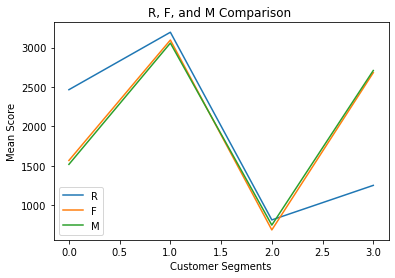

In [58]:
plt.plot(RFM_Stats.index.tolist(), RFM_Stats[('R_Rank',   'mean')])

plt.plot(RFM_Stats.index.tolist(), RFM_Stats[('F_Rank',   'mean')])

plt.plot(RFM_Stats.index.tolist(), RFM_Stats[('M_Rank',   'mean')])

plt.xlabel('Customer Segments')
plt.ylabel('Mean Score')
plt.title('R, F, and M Comparison ')
plt.legend(['R', 'F', 'M'])
plt.savefig(os.getcwd() + '/Plots/RFM_Comparison')
plt.show()

In [59]:
#Distribution of Customer_Segments(Target)
cust_seg_obj = uf.GetStats(RFM[['CustomerID', 'Customer_Segments']])

cust_seg_obj.categorical_distribution('Customer_Segments')

,Category,Counts,Percentage
1,1,1153,29.19
2,2,1123,28.43
0,0,918,23.24
3,3,756,19.14


## Create Customer Tags

0 --> New Customer

1 --> Best Customer

2 --> Churned Customer

3 --> Risk of Leaving

In [62]:

RFM['Customer Tags'] = RFM['Customer_Segments'].map(customer_tags)

cust_seg_obj = uf.GetStats(RFM[['CustomerID', 'Customer Tags']])

cust_seg_obj.categorical_distribution('Customer Tags')

,Category,Counts,Percentage
0,Best Customer,1153,29.19
2,Churned Customer,1123,28.43
3,New Customer,918,23.24
1,Risk of Leaving,756,19.14


## Create Customer Segments

Based on the Quartile values of RFM Score

    rfm score > 2.25 : Top Customer

    2.25 >= rfm score > 1.62  : High Value Customer

    1.62 >= rfm score > 0.95 : Medium value customer

    0.95 >= rfm score > 0.45 : Low-value customer
    
    rfm score =< 0.45 :Lost Customer

## Distribution of Customer Segments

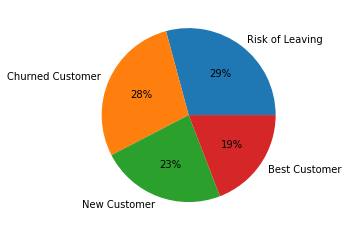

In [49]:
#Based on the Quartiles of RFM_score
plt.pie(RFM['Customer Tags'].value_counts(),
        labels=RFM['Customer Tags'].value_counts().index,
        autopct='%.0f%%')

plt.savefig(os.getcwd() + '/Plots/New_Customer_Distribution.png')
plt.show()

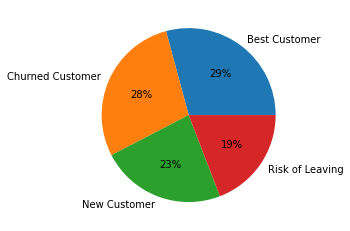

In [64]:
##Based on randomly selected thresholds of RFM_score

plt.pie(RFM['Customer Tags'].value_counts(),
        labels=RFM['Customer Tags'].value_counts().index,
        autopct='%.0f%%')

plt.savefig(os.getcwd() + '/Plots/Customer_Distribution.png')
plt.show()


In [51]:
#Final Data Dimensions
#RFM.shape #(3950, 11)


In [52]:
RFM.head()

,CustomerID,Days_SinceLastTxn,InvoiceNo Counts,Total Amount,R_Rank,F_Rank,M_Rank,R_Rank_nrm,R_Rank_score,F_Rank_nrm,F_Rank_score,M_Rank_nrm,M_Rank_score,RFM_score,Customer_Segments,Customer Tags
0,13113.0,3794,40,10510.00,16.0,35.0,71.0,0.0,0,0.010133,0,0.017726,0,0,2,Churned Customer
1,15804.0,3794,19,3848.55,16.0,149.0,311.0,0.0,0,0.044107,0,0.078501,0,0,2,Churned Customer
2,13777.0,3794,41,25748.35,16.0,32.5,29.0,0.0,0,0.009388,0,0.007090,0,0,2,Churned Customer
3,17581.0,3794,31,10736.11,16.0,55.0,67.0,0.0,0,0.016093,0,0.016713,0,0,2,Churned Customer
4,12748.0,3794,224,29072.10,16.0,1.0,22.0,0.0,0,0.000000,0,0.005318,0,0,2,Churned Customer


## Check Cluster Relevance

1. Less Intra-Cluster Distance

2. More Inter-Cluster DIstance

In [53]:
#help(pd.cut)